In [103]:
import matplotlib.pyplot as plt
import mplfinance as mpl
import numpy as np
import pandas as pd
#import streamlit as st
import yfinance as yf
#from mplfinance.styledata import binance


In [109]:
openA = np.random.uniform(100,170)
highA = np.random.uniform(140,200)
lowA = np.random.uniform(95,140)
closeA = np.random.uniform(140,200)

dataMeta = pd.read_csv("C:/Users/ETOUNDI/Downloads/META.csv")
dataset = dataMeta.iloc[::-1].head(400)
#dataset["Ouv."] = dataset[[dataset["Ouv."].replace(",",".") ]]
print(dataset.head())
print(dataset["Ouv."].dtypes)
dataset

           Date Dernier    Ouv.  Plus Haut Plus Bas    Vol. Variation %
501  29/07/2022  159,10  157,69     160,14   155,17  42,07M      -1,01%
500  01/08/2022  159,93  157,25     165,19   155,23  40,60M       0,52%
499  02/08/2022  160,19  158,31     162,24   158,01  27,37M       0,16%
498  03/08/2022  168,80  162,69     169,54   161,57  31,72M       5,37%
497  04/08/2022  170,57  168,29     172,15   166,80  23,94M       1,05%
object


,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
501,29/07/2022,"159,10","157,69","160,14","155,17","42,07M","-1,01%"
500,01/08/2022,"159,93","157,25","165,19","155,23","40,60M","0,52%"
499,02/08/2022,"160,19","158,31","162,24","158,01","27,37M","0,16%"
498,03/08/2022,"168,80","162,69","169,54","161,57","31,72M","5,37%"
497,04/08/2022,"170,57","168,29","172,15","166,80","23,94M","1,05%"
...,...,...,...,...,...,...,...
106,26/02/2024,"481,74","483,47","486,14","480,60","12,10M","-0,47%"
105,27/02/2024,"487,05","479,98","487,27","479,92","10,81M","1,10%"
104,28/02/2024,"484,02","485,00","491,05","482,75","12,72M","-0,62%"
103,29/02/2024,"490,13","488,44","491,70","482,61","17,73M","1,26%"


In [105]:
def f(x):
    if "," in x:
       x = x.replace(",",".")
    return x
def c(chaine):
    chaine = chaine[:-1]
    return chaine

In [106]:
dataset["Ouv."] = dataset["Ouv."].apply(f)
dataset["Ouv."] = dataset["Ouv."].astype(float)
dataset["Dernier"] = dataset["Dernier"].apply(f)
dataset[" Plus Haut"] = dataset[" Plus Haut"].apply(f)
dataset["Plus Bas"] = dataset["Plus Bas"].apply(f)
dataset["Dernier"] = dataset["Dernier"].astype(float)
dataset[" Plus Haut"] = dataset[" Plus Haut"].astype(float)
dataset["Plus Bas"] = dataset["Plus Bas"].astype(float)
dataset["Vol."] = dataset["Vol."].apply(f)
dataset["Vol."] = dataset["Vol."].apply(c)
dataset["Vol."] = dataset["Vol."].astype(float)
print(dataset.head())
print(dataset["Ouv."].dtypes)
df = pd.DataFrame({
    "date": dataset['Date'],
    "open":dataset['Ouv.'],
    "high": dataset[' Plus Haut'],
    "low" : dataset['Plus Bas'],
    "close":dataset['Dernier'],
    "volume":dataset["Vol."]})
df


           Date  Dernier    Ouv.   Plus Haut  Plus Bas   Vol. Variation %
501  29/07/2022   159.10  157.69      160.14    155.17  42.07      -1,01%
500  01/08/2022   159.93  157.25      165.19    155.23  40.60       0,52%
499  02/08/2022   160.19  158.31      162.24    158.01  27.37       0,16%
498  03/08/2022   168.80  162.69      169.54    161.57  31.72       5,37%
497  04/08/2022   170.57  168.29      172.15    166.80  23.94       1,05%
float64


,date,open,high,low,close,volume
501,29/07/2022,157.69,160.14,155.17,159.10,42.07
500,01/08/2022,157.25,165.19,155.23,159.93,40.60
499,02/08/2022,158.31,162.24,158.01,160.19,27.37
498,03/08/2022,162.69,169.54,161.57,168.80,31.72
497,04/08/2022,168.29,172.15,166.80,170.57,23.94
...,...,...,...,...,...,...
106,26/02/2024,483.47,486.14,480.60,481.74,12.10
105,27/02/2024,479.98,487.27,479.92,487.05,10.81
104,28/02/2024,485.00,491.05,482.75,484.02,12.72
103,29/02/2024,488.44,491.70,482.61,490.13,17.73


In [107]:

df["date"] = pd.to_datetime(df["date"],dayfirst=True)
df = df.set_index("date")
df

,open,high,low,close,volume
date,,,,,
2022-07-29,157.69,160.14,155.17,159.10,42.07
2022-08-01,157.25,165.19,155.23,159.93,40.60
2022-08-02,158.31,162.24,158.01,160.19,27.37
2022-08-03,162.69,169.54,161.57,168.80,31.72
2022-08-04,168.29,172.15,166.80,170.57,23.94
...,...,...,...,...,...
2024-02-26,483.47,486.14,480.60,481.74,12.10
2024-02-27,479.98,487.27,479.92,487.05,10.81
2024-02-28,485.00,491.05,482.75,484.02,12.72


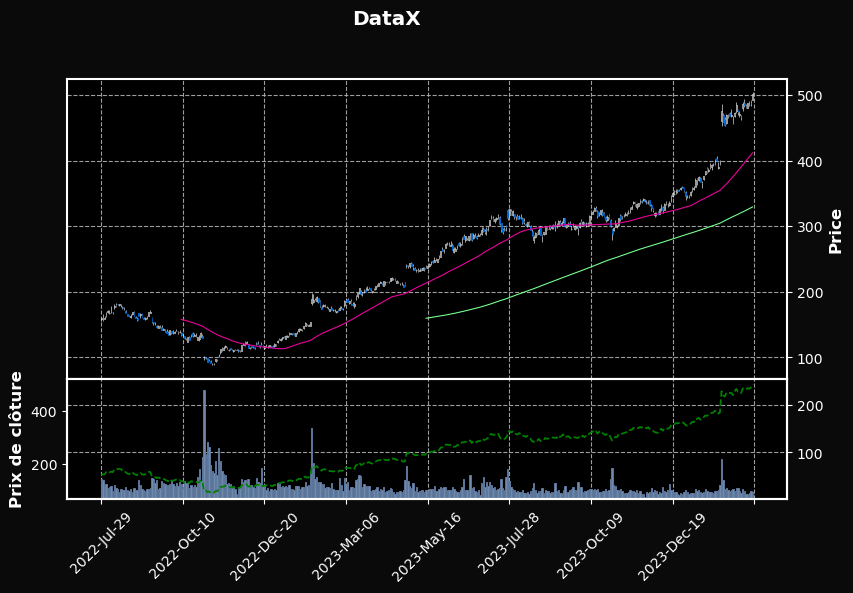

In [108]:
"""# add your own style by passing in kwargs
s = mpl.make_mpf_style(base_mpf_style='charles', rc={'font.size': 6})
fig = mpl.figure(figsize=(10, 7), style=s) # pass in the self defined style to the whole canvas
ax = fig.add_subplot(2,1,1) # main candle stick chart subplot, you can also pass in the self defined style here only for this subplot
av = fig.add_subplot(2,1,2, sharex=ax)  # volume chart subplot
mpl.plot(df, type='candle', ax=ax, volume=av)
"""
my_legend = mpl.make_addplot(df['close'], panel=1, color='g', secondary_y=True, linestyle='dashed', ylabel='Prix de clôture')
mpl.plot(df, type='candle', style='mike',figsize=(10,6),title='DataX',addplot=my_legend,ylabel_lower='',volume=True,mav=(50,200))
# Ajouter une légende à côté du graphique